In [1]:
#visualize the data

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from rdkit import Chem
from rdkit.Chem import Draw
from PIL import Image
import base64
from io import BytesIO

# Load the dataset
file_path = 'carboxylates.csv'  # Update the file path accordingly
df = pd.read_csv(file_path)

def reverselg(lgA):
    return 10**(lgA)
df['Absorbance at 420 nm'] = df['Absorbance at 420 nm (lgA)'].apply(reverselg)

# Normalize values for sliders
def Min_Max(series):
    return (series.min(), series.max())

Min_Max_values = [(0, 0) for i in range(7)]
Min_Max_values[0] = Min_Max(df['1H-NMR CA proton'])
Min_Max_values[1] = Min_Max(df['13C-NMR CA carbon'])
Min_Max_values[2] = Min_Max(df['IR unsymmetric CA stretching'])
Min_Max_values[3] = Min_Max(df['pKa H2O'])
Min_Max_values[4] = Min_Max(df['pKa DMSO'])
Min_Max_values[5] = Min_Max(df['Absorbance at 420 nm'])
Min_Max_values[6] = Min_Max(df['Yield'])

# Function to convert PIL image to base64
def pil_to_base64(img):
    buffered = BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

for carboxylate_num in range(len(df)):
# for carboxylate_num in range(1):
    # Generate molecule image from SMILES
    smiles = df.loc[carboxylate_num, 'smiles']  # Use the first row as an example
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(600, 600))
    img_base64 = pil_to_base64(img)

    # Create the figure
    fig = go.Figure()

    # Add the chemical structure image to the figure
    fig.add_layout_image(
        dict(
            source=f"data:image/png;base64,{img_base64}",
            xref="paper", yref="paper",
            x=0, y=1,
            sizex=0.2, sizey=0.4,
            xanchor="left", yanchor="top"
        )
    )

    # Define sliders data
    sliders = {
        '<sup>1</sup>H-NMR -CO<sub>2</sub><b>H</b>': df['1H-NMR CA proton'],
        '<sup>13</sup>C-NMR -<b>C</b>O<sub>2</sub>H': df['13C-NMR CA carbon'],
        'IR (cm<sup>-1</sup>) -<b>CO<sub>2</sub></b>H': df['IR unsymmetric CA stretching'],
        'pKa H<sub>2</sub>O': df['pKa H2O'],
        'pKa DMSO': df['pKa DMSO'],
        'Absorbance': df['Absorbance at 420 nm'],
        '<b>Yield (%)</b>': df['Yield']
    }

    annotations = []
    gauge_size = [0.15,0.15]
    room_ratio = 1.8
    title_space = 0.08
    y_align = 0.1
    # Add the sliders to the figure
    for i, (key, values) in enumerate(sliders.items()):
        if i == 0:
            x0 = 0.3
            x1 = x0 + gauge_size[0]
            x_text = (x0 + x1)/2-0.06
            y0 = 1-y_align - i * gauge_size[1]*room_ratio - gauge_size[1]
            y1 = y0 + gauge_size[1]
            y_text = y1 + title_space

        elif i == 1:
            x0 = 0.3
            x1 = x0 + gauge_size[0]
            x_text = (x0 + x1)/2-0.06
            y0 = 1-y_align - i * gauge_size[1]*room_ratio - gauge_size[1]
            y1 = y0 + gauge_size[1]
            y_text = y1 + title_space

        elif i == 2:
            x0 = 0.3
            x1 = x0 + gauge_size[0]
            x_text = (x0 + x1)/2-0.06
            y0 = 1-y_align - i * gauge_size[1]*room_ratio - gauge_size[1]
            y1 = y0 + gauge_size[1]
            y_text = y1 + title_space - 0.015

        elif i == 3 :
            x0 = 0.5
            x1 = x0 + gauge_size[0]
            x_text = (x0 + x1)/2
            y0 = 1-y_align - (i-3)* gauge_size[1]*room_ratio - gauge_size[1]
            y1 = y0 + gauge_size[1]
            y_text = y1 + title_space

        elif i == 4 :
            x0 = 0.5
            x1 = x0 + gauge_size[0]
            x_text = (x0 + x1)/2
            y0 = 1-y_align - (i-3)* gauge_size[1]*room_ratio - gauge_size[1]
            y1 = y0 + gauge_size[1]
            y_text = y1 + title_space

        elif i == 5 :
            x0 = 0.5
            x1 = x0 + gauge_size[0]
            x_text = (x0 + x1)/2
            y0 = 1-y_align - (i-3)* gauge_size[1]*room_ratio - gauge_size[1]
            y1 = y0 + gauge_size[1]
            y_text = y1 + title_space - 0.015

        else:
            x0 = 0.05
            x1 = x0 + gauge_size[0]
            x_text = (x0 + x1)/2-0.04
            y0 = 1-y_align - 2* gauge_size[1]*room_ratio - gauge_size[1]
            y1 = y0 + gauge_size[1]
            y_text = y1 + title_space - 0.015

        fig.add_trace(go.Indicator(
            mode="gauge+number",
            value=values[carboxylate_num],  # Adjust index if needed
            number={'font': {'size': 26, 'color': 'black', 'family': 'Arial Black'},
                    'valueformat': ".2f",},
            # title={'text': f"{key}", 'font': {'size': 10, 'color': 'black'},'align':'left'},
            gauge={
                'axis': {'range': [Min_Max_values[i][0], Min_Max_values[i][1]], 'tickfont': {'size': 16}},
                'bar': {'color': 'green'},
                'borderwidth': 2,
                'bordercolor': "gray",
                'steps': [
                    {'range': [Min_Max_values[i][0], Min_Max_values[i][1]], 'color': "lightgray"}
                ]
            },
            domain={'x': [x0, x1], 'y': [y0, y1]}
        ))

        # Add annotation for the title
        annotations.append(dict(
            x=x_text, y=y_text,
            xref="paper", yref="paper",
            text=f"{key}",
            showarrow=False,
            font=dict(size=26, color="blue"),
            # align="left"
        ))

    # Update layout with grid lines and outside borders
    x_borders = [0.27, 0.69]
    y_borders = [0.18]
    fig.update_layout(
        height=800,
        width=1600,
        margin={'t': 20, 'b': 20, 'l': 20, 'r': 20},
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        shapes=[
            # Vertical line to separate the chemical structure and the gauges
            dict(type="line", x0=x_borders[0], x1=x_borders[0], y0=y_borders[0], y1=1, line=dict(color="black", width=2)),
            # Vertical line to separate the two columns of gauges
            dict(type="line", x0=x_borders[1], x1=x_borders[1], y0=y_borders[0], y1=1, line=dict(color="black", width=2)),
            # Outside border lines
            dict(type="line", x0=0, x1=x_borders[1], y0=1, y1=1, line=dict(color="black", width=2)),
            dict(type="line", x0=0, x1=x_borders[1], y0=y_borders[0], y1=y_borders[0], line=dict(color="black", width=2)),
            dict(type="line", x0=0, x1=0, y0=y_borders[0], y1=1, line=dict(color="black", width=2)),
        ],
        annotations=annotations
    )

    fig.show()


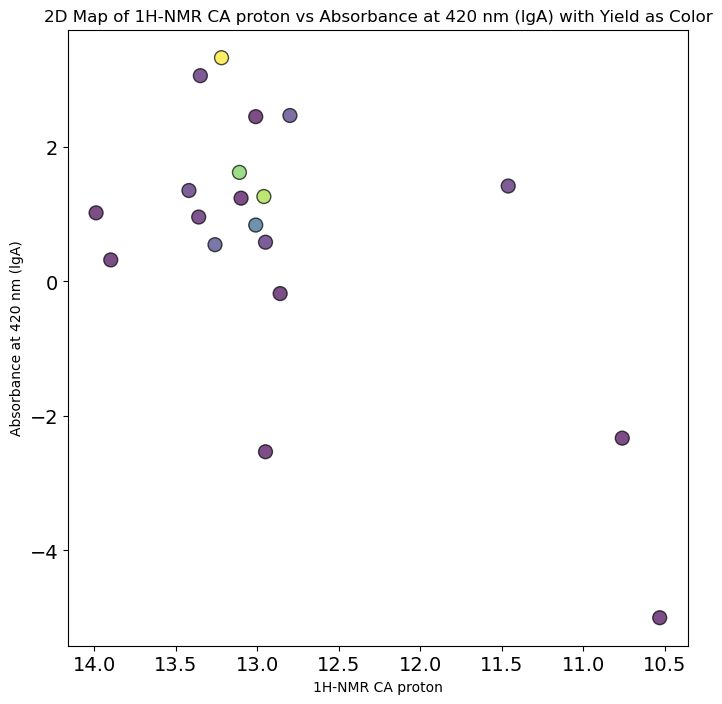

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'carboxylates.csv'  # Update the file path accordingly
df = pd.read_csv(file_path)

# Drop rows with missing values
df = df.dropna()

# Select the features
features = ['1H-NMR CA proton', '13C-NMR CA carbon', 'IR unsymmetric CA stretching', 'pKa H2O', 'pKa DMSO', 'Absorbance at 420 nm (lgA)']
x_param = features[0]
y_param = features[5]
color_param = 'Yield'

# Create a scatter plot
plt.figure(figsize=(8, 8))
scatter = plt.scatter(df[x_param], df[y_param], c=df[color_param], cmap='viridis', s=100, edgecolors='k', alpha=0.7)
# plt.colorbar(scatter, label=color_param)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(x_param)
plt.ylabel(y_param)
plt.title(f'2D Map of {x_param} vs {y_param} with {color_param} as Color')

# Invert the direction of the axes
plt.gca().invert_xaxis()  # Invert the x-axis
# plt.gca().invert_yaxis()  # Invert the y-axis

# Set the aspect ratio to be equal to ensure the plot is square
# plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()


In [3]:
#visualize the data in 3D

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
file_path = 'carboxylates.csv'  # Update the file path accordingly
df = pd.read_csv(file_path)

# Drop rows with missing values
df = df.dropna()

# Create a 3D scatter plot
features = ['1H-NMR CA proton', '13C-NMR CA carbon', 'IR unsymmetric CA stretching', 'pKa H2O', 'pKa DMSO', 'Absorbance at 420 nm (lgA)']
x = df[features[0]].to_numpy()
y = df[features[2]].to_numpy()
z = df[features[5]].to_numpy()
c = df['Yield'].to_numpy()

fig = go.Figure()

# Add the main 3D scatter plot
fig.add_trace(
    go.Scatter3d(
        x=x, y=y, z=z, mode='markers',
        marker=dict(size=10, color=c, colorscale='Viridis', colorbar=dict(title='Yield(%)',title_font=dict(size=22), tickfont=dict(size=14))),
        showlegend=False
    )
)

# Add projection on XY plane
fig.add_trace(
    go.Scatter3d(
        x=x, y=y, z=[min(z)]*len(z), mode='markers',
        marker=dict(size=6, symbol='circle', color=c, colorscale='Viridis', opacity=0.3),
        showlegend=False
    )
)

# Add projection on XZ plane
fig.add_trace(
    go.Scatter3d(
        x=x, y=[min(y)]*len(y), z=z, mode='markers',
        marker=dict(size=6, symbol='circle', color=c, colorscale='Viridis', opacity=0.3),
        showlegend=False
    )
)

# Add projection on YZ plane
fig.add_trace(
    go.Scatter3d(
        x=[min(x)]*len(x), y=y, z=z, mode='markers',
        marker=dict(size=6, symbol='circle', color=c, colorscale='Viridis', opacity=0.3),
        showlegend=False
    )
)

# Add guiding lines for projections
for i in range(len(x)):
    fig.add_trace(go.Scatter3d(x=[x[i], x[i]], y=[y[i], y[i]], z=[z[i], min(z)], mode='lines', line=dict(color='gray', width=1), showlegend=False))
    fig.add_trace(go.Scatter3d(x=[x[i], x[i]], y=[min(y), y[i]], z=[z[i], z[i]], mode='lines', line=dict(color='gray', width=1), showlegend=False))
    fig.add_trace(go.Scatter3d(x=[min(x), x[i]], y=[y[i], y[i]], z=[z[i], z[i]], mode='lines', line=dict(color='gray', width=1), showlegend=False))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='<sup>1</sup>H-NMR -CO<sub>2</sub><b>H</b>',
        yaxis_title='IR (cm<sup>-1</sup>) -<b>CO<sub>2</sub></b>H',
        zaxis_title='lg A (420 nm)',
        # caxis_title='Yield(%)',
        xaxis=dict(title_font=dict(size=22), tickfont=dict(size=14)),
        yaxis=dict(title_font=dict(size=22), tickfont=dict(size=14)),
        zaxis=dict(title_font=dict(size=22), tickfont=dict(size=14)),
        # caxis=dict(title_font=dict(size=22), tickfont=dict(size=14))
    ),
    title='3D Plot of Yield with Projections on XY, XZ, and YZ Planes',
    width=1200,
    height=1100
)

fig.show()


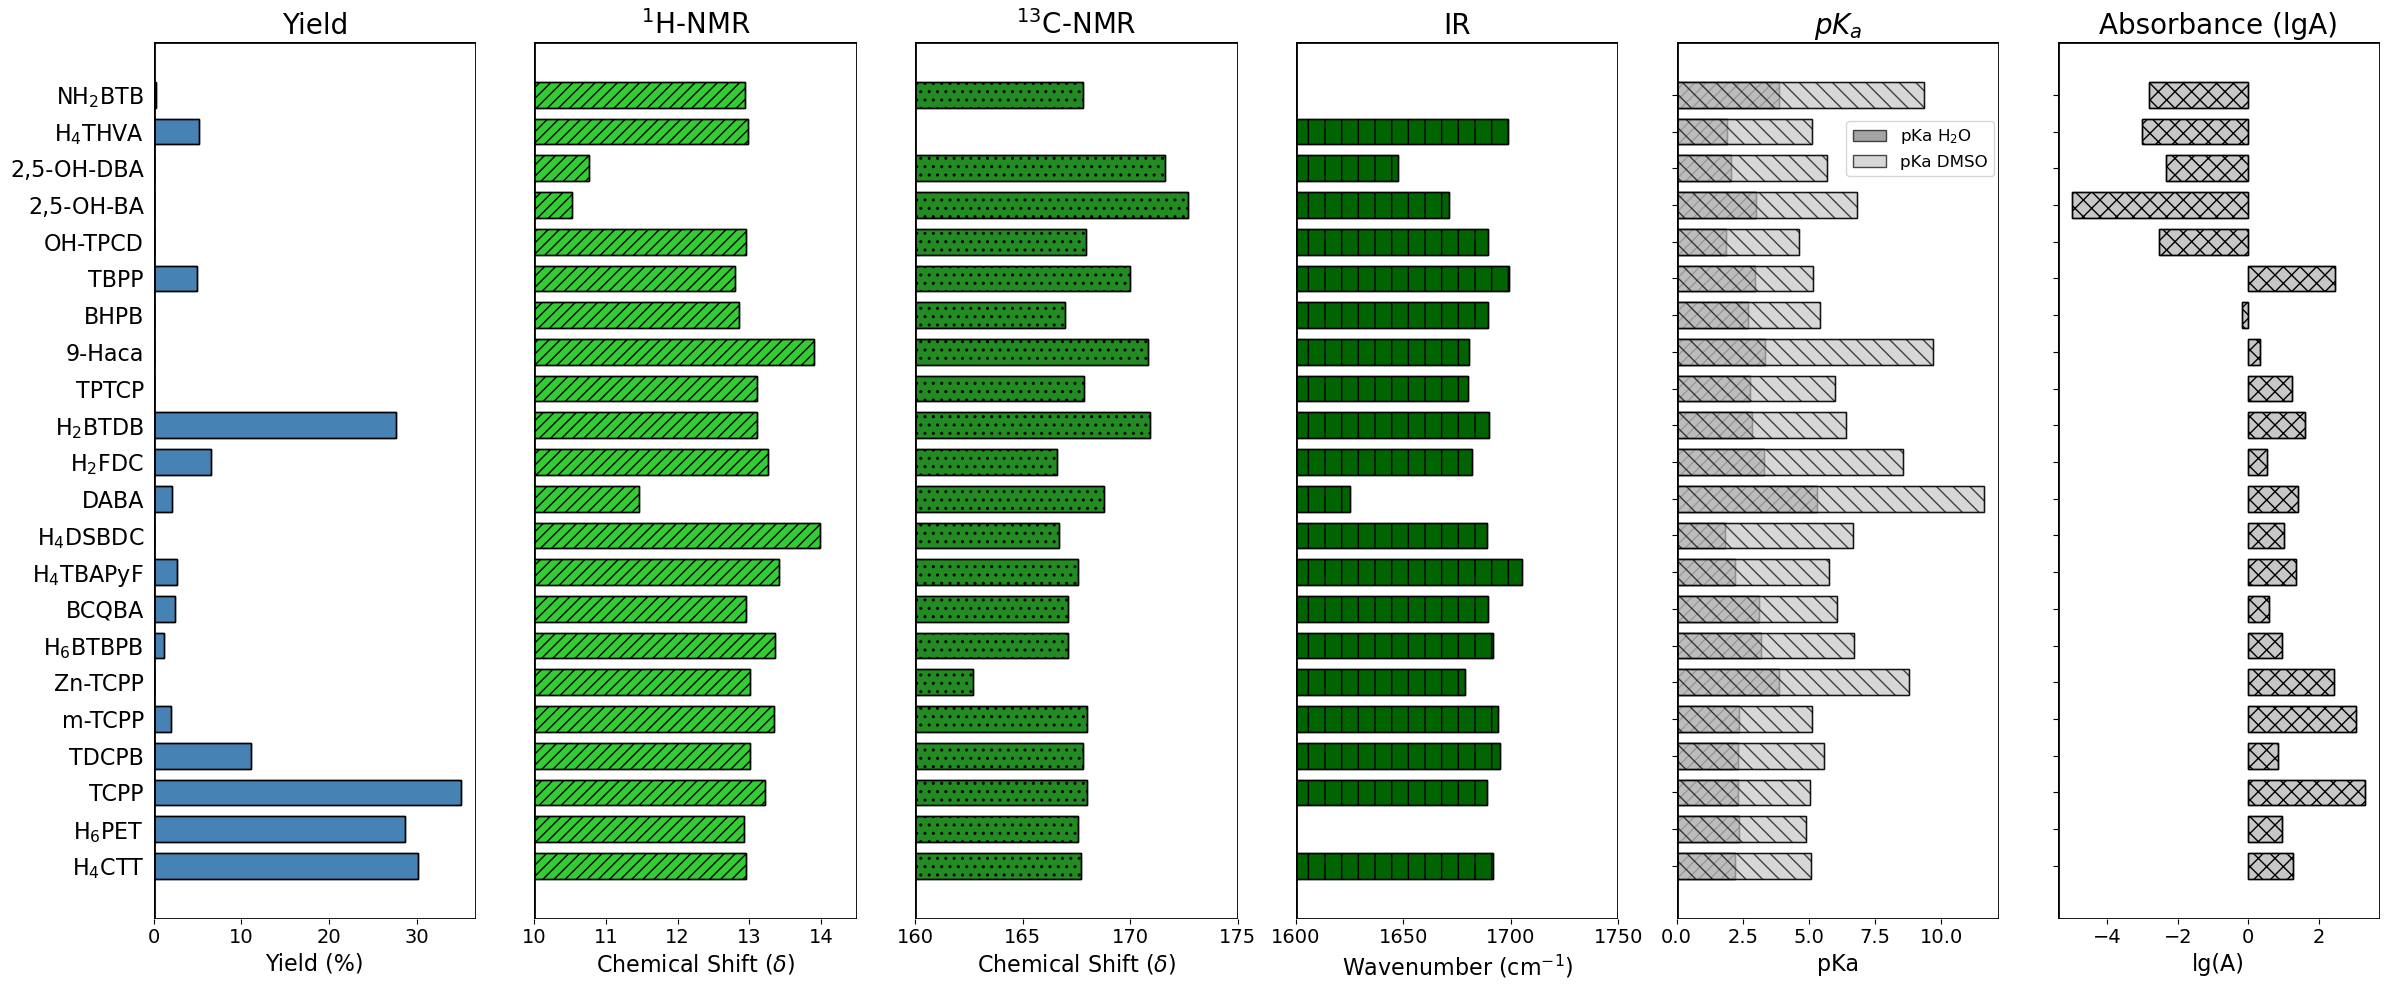

In [4]:
#visualize the data in bar plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.font_manager import FontProperties

# Load data from CSV file
df = pd.read_csv('carboxylates.csv')

# Apply necessary subscripts in the names
df["Names"] = (
    df["Names"]
    .str.replace("NH2", "NH$_2$", regex=False)
    .str.replace("CO2", "CO$_2$", regex=False)
    .str.replace("H2", "H$_2$", regex=False)
    .str.replace("H4", "H$_4$", regex=False)
    .str.replace("H6", "H$_6$", regex=False)
    .str.replace("2-5", "2,5", regex=False)
)

# Property titles and x-axis labels
property_titles = ["Yield", r"$^1$H-NMR", r"$^{13}$C-NMR", "IR", r"$pK_a$", "Absorbance (lgA)"]
x_labels_with_units = [
    "Yield (%)",
    r"Chemical Shift ($\delta$)",
    r"Chemical Shift ($\delta$)",
    "Wavenumber (cm$^{-1}$)",
    "pKa",
    "lg(A)",
]

# Properties with limits
properties_with_limits = [
    ("Yield", None),
    ("1H-NMR CA proton", (10, 14.5)),
    ("13C-NMR CA carbon", (160, 175)),
    ("IR unsymmetric CA stretching", (1600, 1750)),
    ("pKa H2O", None),
    ("Absorbance at 420 nm (lgA)", None),
]

# Define colors
adjusted_colors_final = [
    "#4682B4",  # Darker blue for Yield
    "#32CD32",  # Green for H-NMR
    "#228B22",  # Darker green for C-NMR
    "#006400",  # Deep green for IR
    "#7f7f7f",  # Grey for pKa
    "#c7c7c7",  # Light grey for Absorbance
]

# Create the figure
fig, axes = plt.subplots(1, 6, figsize=(24, 10), sharey=True)

# Define hatching patterns
hatch_patterns = ['', '///', '..', '|']

# Define font properties for bold text
bold_font = FontProperties(weight='bold')

for i, (prop, xlim) in enumerate(properties_with_limits[:-2]):
    # Solid color bars
    axes[i].barh(df["Names"], df[prop], color=adjusted_colors_final[i], edgecolor='black', height=0.7)
    # Overlay bars with hatch patterns
    axes[i].barh(df["Names"], df[prop], facecolor='none', edgecolor='black', height=0.7, hatch=hatch_patterns[i])
    axes[i].set_title(property_titles[i], fontsize=20)  # Set title font as bold
    axes[i].set_xlim(xlim) if xlim else None
    axes[i].tick_params(axis="y", labelsize=16, left=False)  # Set y-axis tick labels
    axes[i].tick_params(axis="x", labelsize=14)  # Set x-axis tick labels
    # for label in axes[i].get_yticklabels():
    #     label.set_fontproperties(bold_font)  # Set tick labels font as bold
    axes[i].set_xlabel(x_labels_with_units[i], fontsize=16)  # Set x-axis label font as bold

    if prop in ['13C-NMR CA carbon', 'IR unsymmetric CA stretching']:
        axes[i].locator_params(axis='x', nbins=5)

# Combine pKa H2O and pKa DMSO in one plot and adjust legend position upward
axes[-2].barh(df["Names"], df["pKa H2O"], label="pKa H$_2$O", color=adjusted_colors_final[4], edgecolor='black', alpha=0.7, height=0.7)
axes[-2].barh(df["Names"], df["pKa H2O"], facecolor='none', edgecolor='black', alpha=0.7, height=0.7, hatch='///')
axes[-2].barh(df["Names"], df["pKa DMSO"], label="pKa DMSO", color=adjusted_colors_final[5], edgecolor='black', alpha=0.7, height=0.7)
axes[-2].barh(df["Names"], df["pKa DMSO"], facecolor='none', edgecolor='black', alpha=0.7, height=0.7, hatch='\\\\')
axes[-2].set_title(property_titles[-2], fontsize=20)  # Set title font as bold
axes[-2].legend(fontsize=12, loc="upper right", bbox_to_anchor=(1.01, 0.92))
axes[-2].tick_params(axis="x", labelsize=14)  # Set x-axis tick labels
axes[-2].set_xlabel(x_labels_with_units[4], fontsize=16)  # Set x-axis label font as bold

# Add Absorbance plot with hatch
axes[-1].barh(df["Names"], df["Absorbance at 420 nm (lgA)"], color=adjusted_colors_final[5], edgecolor='black', height=0.7)
axes[-1].barh(df["Names"], df["Absorbance at 420 nm (lgA)"], facecolor='none', edgecolor='black', height=0.7, hatch='xx')
axes[-1].set_title(property_titles[-1], fontsize=20)  # Set title font as bold
axes[-1].tick_params(axis="x", labelsize=14)  # Set x-axis tick labels
axes[-1].set_xlabel(x_labels_with_units[5], fontsize=16)  # Set x-axis label font as bold

# Remove unnecessary background scales and clean up the axes
for ax in axes:
    ax.grid(False)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    # Add a box around each subplot
    rect = Rectangle((0, 0), 1, 1, transform=ax.transAxes, fill=False, edgecolor='black', linewidth=2)
    ax.add_patch(rect)

# Adjust layout for a clean presentation
plt.tight_layout()

# Show the plots
plt.show()

In [5]:
#get IUAPC names
import pubchempy as pcp
import pandas as pd

# Sample list of CAS numbers (replace with your actual list)

# Load data from CSV file
df = pd.read_csv('carboxylates.csv')

# Apply necessary subscripts in the names
df["Names"] = (
    df["Names"]
    .str.replace("NH2", "NH$_2$", regex=False)
    .str.replace("CO2", "CO$_2$", regex=False)
    .str.replace("H2", "H$_2$", regex=False)
    .str.replace("H4", "H$_4$", regex=False)
    .str.replace("H6", "H$_6$", regex=False)
    .str.replace("2-5", "2,5", regex=False)
)

# Function to get IUPAC name from CAS number
def get_iupac_name(cas_number):
    try:
        compound = pcp.get_compounds(cas_number, 'name')
        if compound:
            return compound[0].iupac_name
        else:
            return None
    except Exception as e:
        print(f"Error fetching IUPAC name for CAS {cas_number}: {e}")
        return None

# Create a DataFrame to store CAS numbers and IUPAC names

df['IUPAC Name'] = df['CAS'].apply(get_iupac_name)

# Display the DataFrame
print(df)

             CAS        Names  \
0   1821122-35-3     H$_4$CTT   
1   1835723-11-9     H$_6$PET   
2     14609-54-2         TCPP   
3   1331745-95-9        TDCPB   
4     70152-54-4       m-TCPP   
5     27647-84-3      Zn-TCPP   
6   1246015-42-8   H$_6$BTBPB   
7   1643112-46-2        BCQBA   
8   2682204-04-0  H$_4$TBAPyF   
9     25906-66-5   H$_4$DSBDC   
10      619-05-6         DABA   
11      792-26-7     H$_2$FDC   
12  1581774-76-6    H$_2$BTDB   
13   933047-52-0        TPTCP   
14      723-62-6       9-Haca   
15  1374404-53-1         BHPB   
16   609365-68-6         TBPP   
17  2143095-89-8      OH-TPCD   
18      490-79-9    2,5-OH-BA   
19      610-92-4   2,5-OH-DBA   
20  1542274-12-3    H$_4$THVA   
21  1414662-67-1    NH$_2$BTB   

                                               smiles  1H-NMR CA proton  \
0   OC(C(C=C1)=CC=C1C2=CC3=C(C=C2C4=CC=C(C(O)=O)C=...             12.96   
1   OC(C(C=C1)=CC=C1C2=CC(C34)=C(C(C5=C4C=C(C6=CC=...             12.92   
2   O=C(O)C(C=C

In [ ]:
df[['Names','CAS','smiles','IUPAC Name']].to_csv('carboxylates_iupac.csv', index=False)

In [7]:
import pubchempy as pcp
import pandas as pd

# Load data from CSV file
df = pd.read_csv('porphyrins.csv')

# Function to get IUPAC name from SMILES
def get_iupac_name(smiles):
    try:
        compound = pcp.get_compounds(smiles, 'smiles')
        if compound:
            return compound[0].iupac_name
        else:
            return None
    except Exception as e:
        print(f"Error fetching IUPAC name for SMILES {smiles}: {e}")
        return None

# Create a DataFrame to store SMILES and IUPAC names
df['IUPAC Name'] = df['smiles'].apply(get_iupac_name)
# Function to get CAS number from SMILES
def get_cas_number(smiles):
    try:
        compound = pcp.get_compounds(smiles, 'smiles')
        if compound:
            return compound[0].cas
        else:
            return None
    except Exception as e:
        print(f"Error fetching CAS number for SMILES {smiles}: {e}")
        return None

# Add CAS numbers to the DataFrame
df['CAS'] = df['smiles'].apply(get_cas_number)

# Display the DataFrame
print(df)


Error fetching CAS number for SMILES C1(/C(C2=CC=CC=C2)=C(C=C/3)\NC3=C4\C5=CC=CC=C5)=N/C(C=C1)=C(C6=CC=CC=C6)\C7=CC=C(/C(C8=CC=CC=C8)=C9C=CC4=N/9)N7: 'Compound' object has no attribute 'cas'
Error fetching CAS number for SMILES O=C(O)C(C=C1)=CC=C1/C(C2=CC=C(/C(C3=CC=C(C(O)=O)C=C3)=C4N=C(/C(C5=CC=C(C(O)=O)C=C5)=C(C=C/6)\NC6=C7\C8=CC=C(C(O)=O)C=C8)C=C\4)N2)=C9C=CC7=N\9: 'Compound' object has no attribute 'cas'
Error fetching CAS number for SMILES O=C(O)C1=CC=CC(/C(C2=CC=C(/C(C3=CC(C(O)=O)=CC=C3)=C4C=CC5=N/4)N2)=C6N=C(/C(C7=CC(C(O)=O)=CC=C7)=C(C=C/8)\NC8=C5\C9=CC(C(O)=O)=CC=C9)C=C/6)=C1: 'Compound' object has no attribute 'cas'
Error fetching CAS number for SMILES O=C(OC)C(C=C1)=CC=C1/C(C2=CC=C(/C(C3=CC=C(C(OC)=O)C=C3)=C4N=C(/C(C5=CC=C(C(OC)=O)C=C5)=C(C=C/6)\NC6=C7\C8=CC=C(C(OC)=O)C=C8)C=C\4)N2)=C9C=CC7=N\9: 'Compound' object has no attribute 'cas'
Error fetching CAS number for SMILES BrC(C=C1)=CC=C1/C(C2=CC=C(/C(C3=CC=C(Br)C=C3)=C4C=CC5=N/4)N2)=C6N=C(/C(C7=CC=C(Br)C=C7)=C(C=C/8)\NC8=C5\C

In [ ]:
df.to_csv('porphyrins_iupac_cas.csv', index=False)

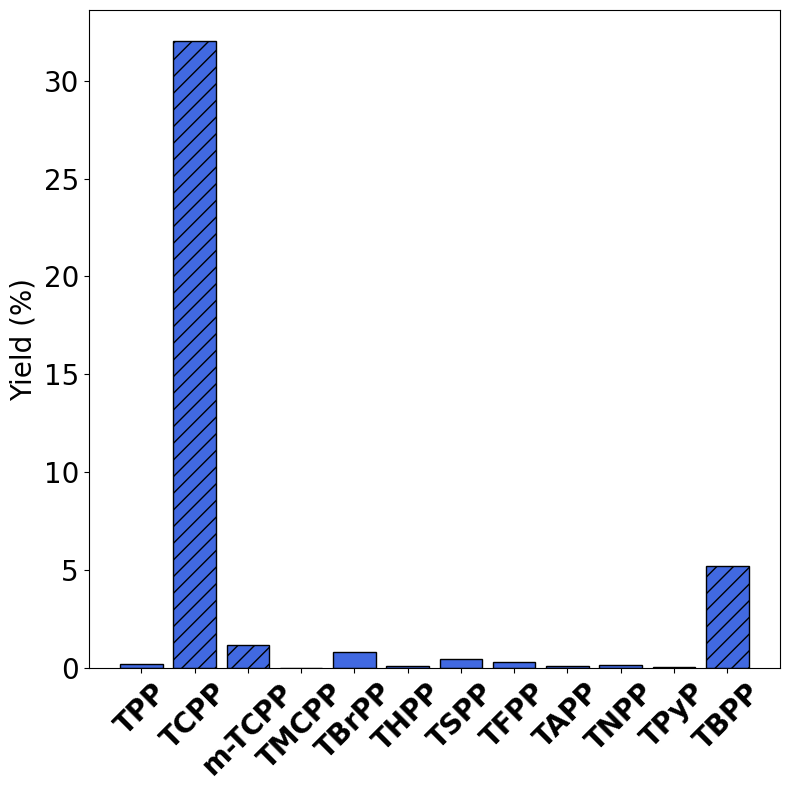

In [8]:
import matplotlib.pyplot as plt

# Example data
data_cleaned = {
    'Names': ['TPP', 'TCPP', 'm-TCPP', 'TMCPP', 'TBrPP', 'THPP', 'TSPP', 'TFPP', 'TAPP', 'TNPP', 'TPyP', 'TBPP'],
    'Yield': [0.22, 32.0, 1.17, 0.03, 0.86, 0.1, 0.5, 0.3, 0.12, 0.15, 0.08, 5.2],
}

# Highlighted names
highlighted_names = ['TCPP', 'm-TCPP', 'TBPP']

# Plot
plt.figure(figsize=(8, 8))
bars = plt.bar(data_cleaned['Names'], data_cleaned['Yield'], color='royalblue', edgecolor='black')

# Adding hatching for the highlighted acids
for bar, name in zip(bars, data_cleaned['Names']):
    if name in highlighted_names:
        bar.set_hatch('//')  # Hatching for emphasis

# Customizing labels and fonts
plt.ylabel('Yield (%)', fontsize=20)
plt.xticks(rotation=45, ha='center', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.grid(False)

plt.tight_layout()
plt.show()


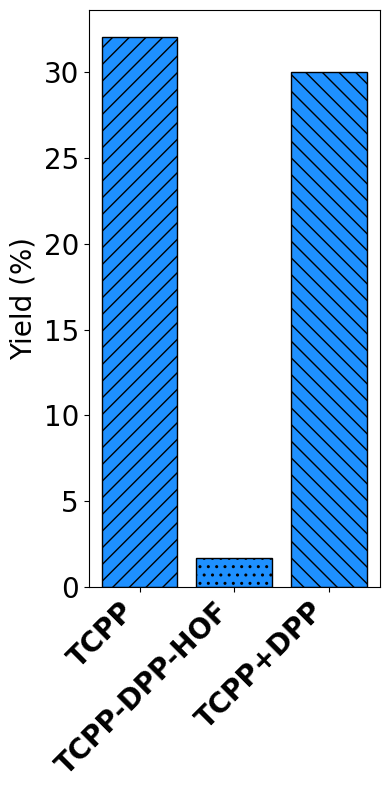

In [9]:
import matplotlib.pyplot as plt

# Example data
data_cleaned = {
    'Names': ['TCPP', 'TCPP-DPP-HOF', 'TCPP+DPP'],
    'Yield': [32, 1.7, 30],
}

# Plot
plt.figure(figsize=(4, 8))
bars = plt.bar(data_cleaned['Names'], data_cleaned['Yield'], color='dodgerblue', edgecolor='black')

# Adding hatching for the highlighted acids
for bar, name in zip(bars, data_cleaned['Names']):
    if name == 'TCPP':
        bar.set_hatch('//')  # Hatching for emphasis
    elif name == 'TCPP-DPP-HOF':
        bar.set_hatch('..')  # Hatching for emphasis
    elif name == 'TCPP+DPP':
        bar.set_hatch('\\\\')  # Hatching for emphasis

# Customizing labels and fonts
plt.ylabel('Yield (%)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.grid(False)

plt.tight_layout()
plt.show()
